In [1]:
using Base.Threads
using BenchmarkTools
using Plots

In [2]:
N = 100_000
x = rand(N)
J = 100
L = 1
dx = L/(J-1)
d = zeros(Int64,J);


In [3]:

function get_j(i, J, L, x)
    _, j = modf((x[i] / L * J + J) % J)
    j = floor(Int64, j) + 1
    return j
end


get_j (generic function with 1 method)

In [4]:
function get_d!(d,x,J,L)
    for i in 1:length(x)
        j = get_j(i, J, L, x)
        d[j] += 1
    end
end


get_d! (generic function with 1 method)

In [5]:
get_d!(d,x,J,L)

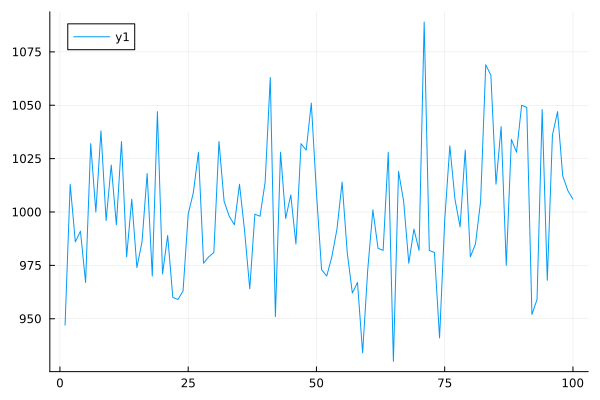

In [6]:
plot(d)

In [7]:
function get_d_threads!(d,x, J, L)
    Threads.@threads for i in 1:length(x)
        j = get_j(i, J, L, x)
        d[j] += 1
    end
end

get_d_threads! (generic function with 1 method)

In [14]:
dtf = zeros(Int64,J)

get_d_threads!(dtf,x, J, L)

sum(abs.(dtf-d))

1767

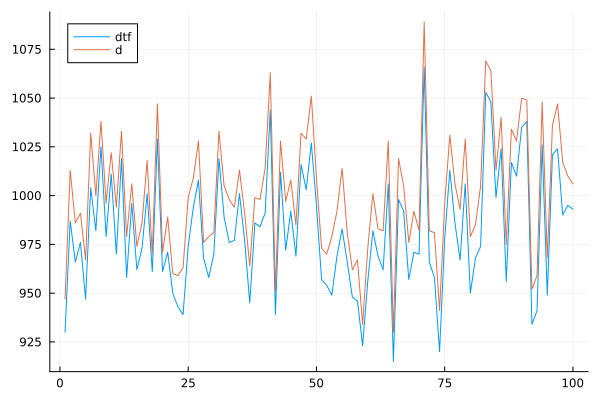

In [9]:
plot(dtf, label="dtf")
plot!(d, label="d")

In [10]:
function get_d_threads_good!(d,x, J, L)
    local_d = zeros(J, nthreads())
    @threads for i in 1:length(x)
        j = get_j(i, J, L, x)
        local_d[j,threadid()] += 1
    end
    d[:] = reduce(+, eachslice(local_d, dims=2));
end

get_d_threads_good! (generic function with 1 method)

In [11]:
dtg = zeros(Int64,J)
get_d_threads_good!(dtg,x, J, L);

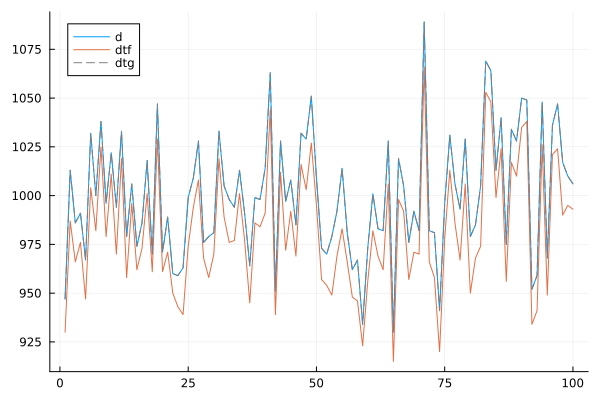

In [12]:
plot(d, label="d")
plot!(dtf, label="dtf")
plot!(dtg, label="dtg", ls=:dash, color="gray")

In [15]:
sum(abs.(dtg - d))

0

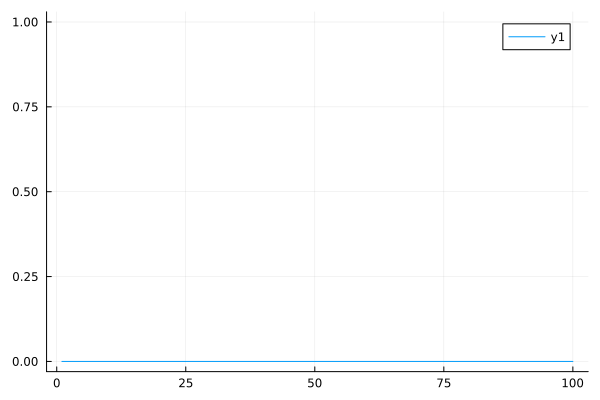

In [16]:
plot(d-dtg)

In [17]:
@btime get_d_threads_good!(dtg,$x, J, L)

  199.271 μs (72 allocations: 21.70 KiB)


100-element Vector{Float64}:
  947.0
 1013.0
  986.0
  991.0
  967.0
 1032.0
 1000.0
 1038.0
  996.0
 1022.0
    ⋮
  952.0
  959.0
 1048.0
  968.0
 1036.0
 1047.0
 1017.0
 1010.0
 1006.0

In [18]:
@btime get_d!(d,$x,J,L)

  1.618 ms (0 allocations: 0 bytes)
